# Stroke Prediction - Modeling

## Capstone Project 1 - Brooke Hanson

### Introduction

### 1: The Problem 

This data was recorded in order for hospitals and healthcare practitioners to better understand the factors that most influence stroke occurance. The goal is to create a predictive model that will determine whether or not new patients will experience a stroke. This is a classification problem.

### 2: The Data

The Kaggle hosts the original problem and the dataset in their website as one of their competitions. Here, I downloaded the data from the Kaggle website. Following are the data fields in the dataset, which we are going to read in the Pandas data frame.

- id 
- gender             
- age                
- hypertension         
- heart_disease        
- ever_married        
- work_type           
- Residence_type     
- avg_glucose_level  
- bmi                
- smoking_status      
- stroke


### Importing Necessary Packages & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency as chi2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [4]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [5]:
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.preprocessing import scale

In [6]:
def acc_met (y_test, y_pred):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    acc = cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1])
    return acc

# Function needed to look at those who have a stroke 

In [7]:
#Importing the data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
# filling NA in BMI
print('Replacing null BMI values with the median:', df['bmi'].median()) 
median_value = 28.1 # can see from info table that the median for bmi is 28.1
df['bmi'].fillna(value=median_value, inplace=True)

Replacing null BMI values with the median: 28.1


In [9]:
# One 'Other' value in gender, replacing with majority value, Female.
df['gender'] = df['gender'].replace('Other', 'Female')

In [10]:
# Taking a look at the spread of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [11]:
# Using these variables for prediction function at end
std_age = df['age'].std()
print(std_age)
mean_age = df['age'].mean()
print(mean_age)
mean_avgglu = df['avg_glucose_level'].mean()
std_avgglu = df['avg_glucose_level'].std()
mean_bmi = df['bmi'].mean()
std_bmi = df['bmi'].std()

22.61264672311352
43.226614481409015


### Testing and Making Model

Here I am replacing the values of 0 and 1 with Yes and No, in the variables hypertension, and heart disease, since these are categorical representations and will be a more accurate representation of the data.

In [12]:
df['hypertension'] = df['hypertension'].replace({0 : 'No', 1 : 'Yes'})
df['heart_disease'] = df['heart_disease'].replace({0: 'No', 1 : 'Yes'})
df = df[['age', 'hypertension','heart_disease', 'avg_glucose_level','bmi','stroke','gender','ever_married','work_type','Residence_type','smoking_status']]

In [13]:
import scipy.stats as stats
df['age'] = stats.zscore(df['age'])
df['avg_glucose_level'] = stats.zscore(df['avg_glucose_level'])
df['bmi'] = stats.zscore(df['bmi'])



### Making Dummy Variables 
Here I will create dummy variables in order to create models

In [14]:
df1 = pd.get_dummies(df, drop_first = True) 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             5110 non-null   float64
 3   stroke                          5110 non-null   int64  
 4   hypertension_Yes                5110 non-null   uint8  
 5   heart_disease_Yes               5110 non-null   uint8  
 6   gender_Male                     5110 non-null   uint8  
 7   ever_married_Yes                5110 non-null   uint8  
 8   work_type_Never_worked          5110 non-null   uint8  
 9   work_type_Private               5110 non-null   uint8  
 10  work_type_Self-employed         5110 non-null   uint8  
 11  work_type_children              5110 non-null   uint8  
 12  Residence_type_Urban            51

### Train Test Split the Data

In [124]:
X = df1.drop('stroke', axis = 1)
y = df1.stroke

In [16]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
#check shape of train and test shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3832, 15), (3832,), (1278, 15), (1278,))

In [18]:
#Check the details of X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3832 entries, 4505 to 860
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3832 non-null   float64
 1   avg_glucose_level               3832 non-null   float64
 2   bmi                             3832 non-null   float64
 3   hypertension_Yes                3832 non-null   uint8  
 4   heart_disease_Yes               3832 non-null   uint8  
 5   gender_Male                     3832 non-null   uint8  
 6   ever_married_Yes                3832 non-null   uint8  
 7   work_type_Never_worked          3832 non-null   uint8  
 8   work_type_Private               3832 non-null   uint8  
 9   work_type_Self-employed         3832 non-null   uint8  
 10  work_type_children              3832 non-null   uint8  
 11  Residence_type_Urban            3832 non-null   uint8  
 12  smoking_status_formerly smoked  

Because this is a classification problem I started model selection by looking at a basic Decision Tree Model

### Decision Tree Model

In [19]:
# Declare the Decision tree, we use class_weight = balanced because there is a large proportion 
# more of patients without strokes than patients with strokes
clf = DecisionTreeClassifier(class_weight = 'balanced',random_state=0)
clf.fit(X_train ,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [20]:
# use the predict function to compare how accurately the decision tree can classify patients
y_pred = clf.predict(X_test)

In [21]:
# We use the confusion matrix to identify True Negatives and True Postitives. In this case we will be looking at 
# True Negatives as the indicator of stroke.
confusion_matrix(y_pred, y_test)

array([[1159,   70],
       [  39,   10]])

This confusion matrix shows that there are 10 true negatives and 70 false negatives. This may not the best predictive model for the data. I will do a grid search to see if the model can be tuned

In [22]:
list(zip(clf.feature_importances_,X_test.columns))

[(0.4670174597015987, 'age'),
 (0.21885984013888318, 'avg_glucose_level'),
 (0.17559699344387, 'bmi'),
 (0.010244003022936725, 'hypertension_Yes'),
 (0.015173973015351557, 'heart_disease_Yes'),
 (0.014755489214728903, 'gender_Male'),
 (0.0035771962568460843, 'ever_married_Yes'),
 (0.0, 'work_type_Never_worked'),
 (0.010669031948152026, 'work_type_Private'),
 (0.021806427352660637, 'work_type_Self-employed'),
 (0.0, 'work_type_children'),
 (0.008023519926967785, 'Residence_type_Urban'),
 (0.02378608161034704, 'smoking_status_formerly smoked'),
 (0.028924349831917415, 'smoking_status_never smoked'),
 (0.0015656345357399316, 'smoking_status_smokes')]

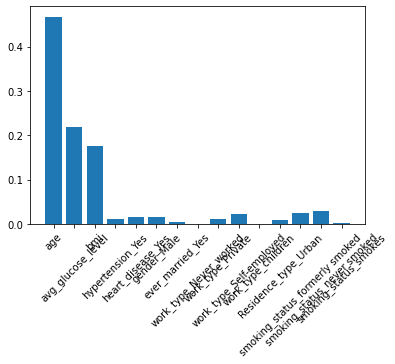

In [23]:
importance = clf.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13, 14], labels = X_test.columns, rotation = 45)
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

In [24]:
cv_scores_test= cross_val_score(clf,X_test,y_test,cv=5,scoring='recall')
cv_scores_train= cross_val_score(clf,X_train,y_train,cv=5,scoring='recall')
print(cv_scores_test)
cv_scores_dt_test= cv_scores_test.mean()
cv_scores_dt_train= cv_scores_train.mean()
cv_scores_std_dt= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_dt_test))
print ('Mean cross validation train score: ' +str(cv_scores_dt_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_dt))

[0.0625 0.0625 0.25   0.4375 0.0625]
Mean cross validation test score: 0.175
Mean cross validation train score: 0.13654188948306595
Standard deviation in cv scores: 0.15


In [25]:
# Here is where I will use the above defined acc_met function to determine the recall, or the score of whether the
# model will be able to predict strokes
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
rc_dt = acc_met(y_test, y_pred)
print('Decision Tree: Recall=%.3f' % (rc_dt))

[[1159   39]
 [  70   10]]
Decision Tree: Recall=0.125


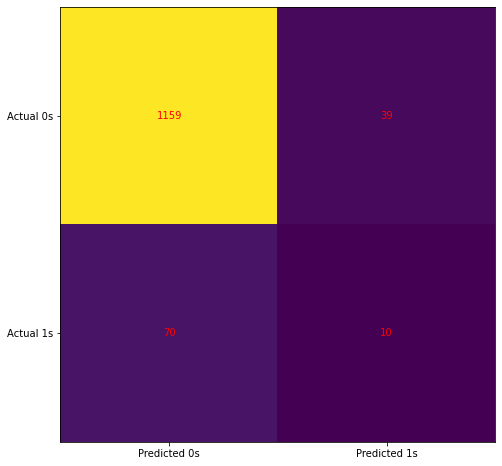

In [26]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [27]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 3, test_size = 0.20, random_state = 0)
    
    #  Create a decision tree regressor object
    regressor = DecisionTreeClassifier(class_weight = 'balanced')

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth":[5,8, 10, 12, 20, 25, 30],
             "criterion" : ['entropy', 'gini']}

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(acc_met)

    #   Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
 #   print "Parameter 'max_depth' is {} for the optimal model.".format(grid.get_params() )

    # Return the optimal model after fitting the data
    return grid 

reg = fit_model(X_train, y_train)

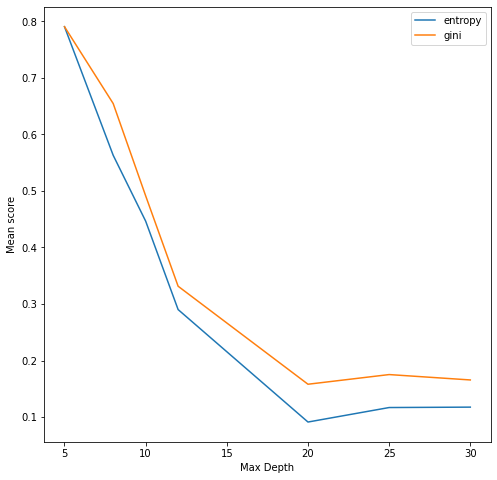

In [28]:
scores = list(reg.cv_results_['mean_test_score'])
scores = np.array(scores).reshape(2,7)
criterion = ['entropy', 'gini']

for ind, i in enumerate(scores):
    plt.plot([5,8,10,12,20,25,30], i, label=criterion[ind])
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Mean score')
plt.show()


From this graph we can determine the best hyperparameters for the decision tree model are gini with a max depth of 12

In [29]:
clf = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 12, criterion = 'gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12)

In [30]:
y_pred = clf.predict(X_test)

In [31]:
confusion_matrix(y_test, y_pred)

array([[1091,  107],
       [  58,   22]])

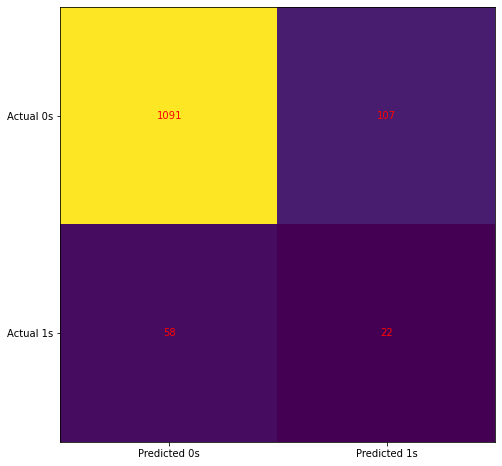

In [32]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [33]:
rc_dt = acc_met(y_test, y_pred)
print('Tuned Decision Tree: Recall=%.3f' % (rc_dt))

Tuned Decision Tree: Recall=0.275


We can see that the confusion matrix is better than the previous one for the model. We have higher scores where we are interested in, such as the increase in the lower right cell from 17 to 22 and less false positives from  72 to 58. So we know the hyperparamters have helped tune the model

### K Nearest Neighbor

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

print(nca_pipe.score(X_test, y_test))

0.9248826291079812


In [35]:
y_pred = knn.predict(X_test)

In [36]:
print("Recall Score: %f%%" %  acc_met(y_test,y_pred))

Recall Score: 0.025000%


In [37]:
# Looking at the difference in scaled data and unscaled data
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(Xs_train, y_train)

print(nca_pipe.score(Xs_test, y_test))

0.9358372456964006


In [38]:
y_pred = knn.predict(X_test)

In [39]:
print("Recall Score: %f%%" %  acc_met(y_test,y_pred))

Recall Score: 0.000000%


In [40]:
#scaled train test
cv_scores_test= cross_val_score(knn,Xs_test,y_test,cv=5,scoring='recall')
cv_scores_train= cross_val_score(knn,Xs_train,y_train,cv=5,scoring='recall')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.     0.     0.0625 0.0625 0.    ]
Mean cross validation test score: 0.025
Mean cross validation train score: 0.04153297682709448
Standard deviation in cv scores: 0.03061862178478973


In [41]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
rc_knn = acc_met(y_test, y_pred)
print('K Nearest Neighbor: Recall=%.3f' % (rc_knn))

[[1198    0]
 [  80    0]]
K Nearest Neighbor: Recall=0.000


In [42]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 3, test_size = 0.20, random_state = 0)
    
    #  Create a decision tree regressor object
    regressor = KNeighborsClassifier()

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'leaf_size':[2,4,6,8] ,
             'n_neighbors': [3,6,9,12]}

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(acc_met)

    #   Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
 #   print "Parameter 'max_depth' is {} for the optimal model.".format(grid.get_params() )

    # Return the optimal model after fitting the data
    return grid 

reg = fit_model(X_train, y_train)

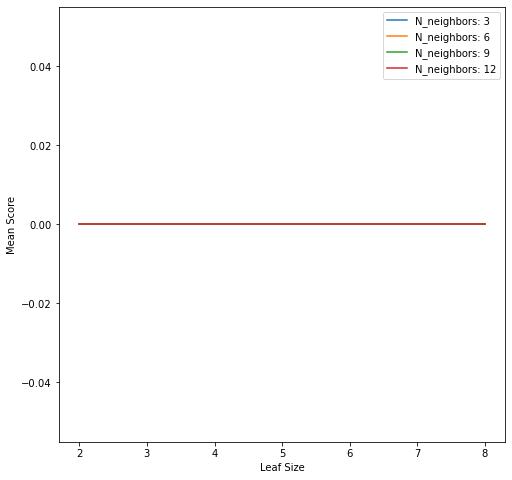

In [43]:
scores = list(reg.cv_results_['mean_test_score'])
scores = np.array(scores).reshape(4,4)
n_neighbors = [3,6,9,12]

for ind, i in enumerate(scores):
    plt.plot([2,4,6,8], scores[ind], label='N_neighbors: ' + str(n_neighbors[ind]))
plt.legend()
plt.xlabel('Leaf Size')
plt.ylabel('Mean Score')
plt.show()

This graph shows us the best combination of the K nearest Neighbor hyper paramters, we can see that is 3 neighbors with a leaf size of 6

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3, leaf_size = 6)

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=6, n_neighbors=3)

In [46]:
y_pred = knn.predict(X_test)

In [47]:
confusion_matrix(y_test, y_pred)

array([[1181,   17],
       [  79,    1]])

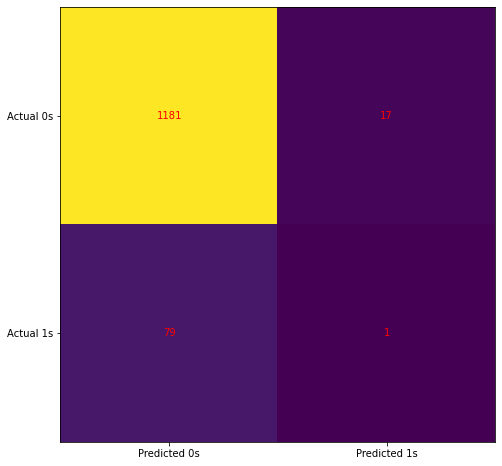

In [48]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

While this is not the best confusion matrix we have seen for the data, the tuning of the hyperparameters did increase the accuracy of predictions

In [49]:
rc_knn = acc_met(y_test, y_pred)
print('Tuned K Nearest Neighbor: Recall=%.3f' % (rc_knn))

Tuned K Nearest Neighbor: Recall=0.013


Again we can see that this may not be the best model for our data, but the tuning of the hyperparameters has increased the recall score 

### Random Forrest Model

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1, class_weight = 'balanced')
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
rc_rf = acc_met(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Recall=%.3f' % (rc_rf))

print(cm)

Random Forest: Recall=0.000
[[1198    0]
 [  80    0]]


In [51]:
list(zip(clf.feature_importances_,X_test.columns))

[(0.38580512419399426, 'age'),
 (0.19880834474147738, 'avg_glucose_level'),
 (0.1778001213845059, 'bmi'),
 (0.03231344913039271, 'hypertension_Yes'),
 (0.025734302365350358, 'heart_disease_Yes'),
 (0.023705267968413914, 'gender_Male'),
 (0.029848121168064005, 'ever_married_Yes'),
 (0.00010758828166932204, 'work_type_Never_worked'),
 (0.01814949623403722, 'work_type_Private'),
 (0.01825534551465376, 'work_type_Self-employed'),
 (0.01257682001973487, 'work_type_children'),
 (0.023542999744293105, 'Residence_type_Urban'),
 (0.01739392334680454, 'smoking_status_formerly smoked'),
 (0.019348740849450416, 'smoking_status_never smoked'),
 (0.01661035505715812, 'smoking_status_smokes')]

age : 0, Score: 0.38581
avg_glucose_level : 1, Score: 0.19881
bmi : 2, Score: 0.17780
hypertension_Yes : 3, Score: 0.03231
heart_disease_Yes : 4, Score: 0.02573
gender_Male : 5, Score: 0.02371
ever_married_Yes : 6, Score: 0.02985
work_type_Never_worked : 7, Score: 0.00011
work_type_Private : 8, Score: 0.01815
work_type_Self-employed : 9, Score: 0.01826
work_type_children : 10, Score: 0.01258
Residence_type_Urban : 11, Score: 0.02354
smoking_status_formerly smoked : 12, Score: 0.01739
smoking_status_never smoked : 13, Score: 0.01935
smoking_status_smokes : 14, Score: 0.01661


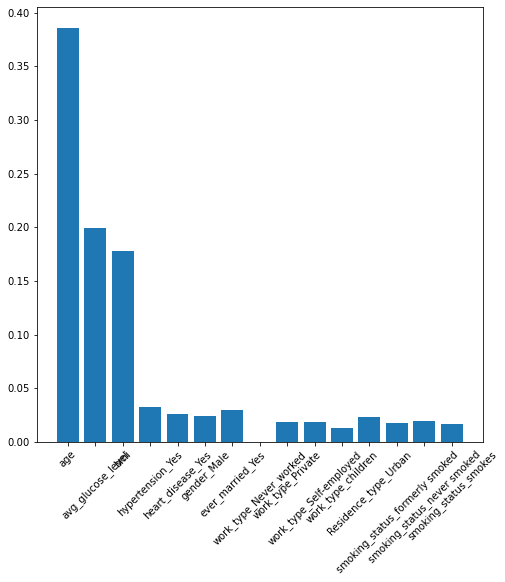

In [52]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(X_test.columns[i],': %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13, 14], labels = X_test.columns, rotation = 45)
plt.rcParams["figure.figsize"] = (8,8)
pyplot.show()

In [53]:
cv_scores_test= cross_val_score(clf,X_test,y_test,cv=5,scoring='recall')
cv_scores_train= cross_val_score(clf,X_train,y_train,cv=5,scoring='recall')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0. 0. 0. 0. 0.]
Mean cross validation test score: 0.0
Mean cross validation train score: 0.011942959001782532
Standard deviation in cv scores: 0.0


In [54]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 3, test_size = 0.20, random_state = 0)
    
    #  Create a decision tree regressor object
    regressor = RandomForestClassifier(class_weight = 'balanced')

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[2,4,6,8] ,
             'n_estimators': [10,20,50,100]}

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(acc_met)

    #   Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
 #   print "Parameter 'max_depth' is {} for the optimal model.".format(grid.get_params() )

    # Return the optimal model after fitting the data
    return grid 

reg = fit_model(X_train, y_train)

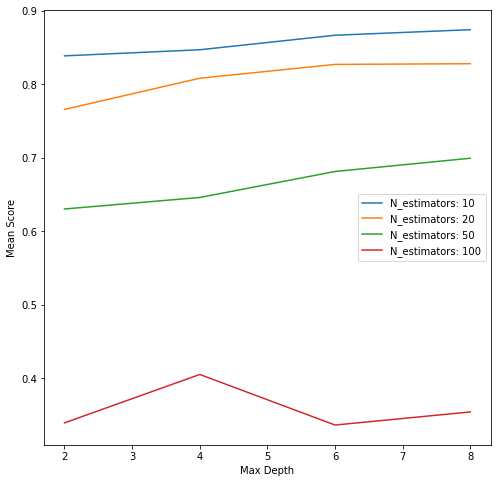

In [55]:
scores = list(reg.cv_results_['mean_test_score'])
scores = np.array(scores).reshape(4,4)
n_estimators = [10,20,50,100]

for ind, i in enumerate(scores):
    plt.plot([2,4,6,8], scores[ind], label='N_estimators: ' + str(n_estimators[ind]))
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Mean Score')
plt.show()

Here we can see that the best hyperparameters for the Random Forrest model seem to be, 10 estimators and a max depth of 6

In [56]:
clf = RandomForestClassifier(class_weight = 'balanced', max_depth = 6, n_estimators = 10)

In [57]:
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=10)

In [58]:
y_pred_rf = clf.predict(X_test)

In [59]:
confusion_matrix(y_test, y_pred_rf)

array([[967, 231],
       [ 32,  48]])

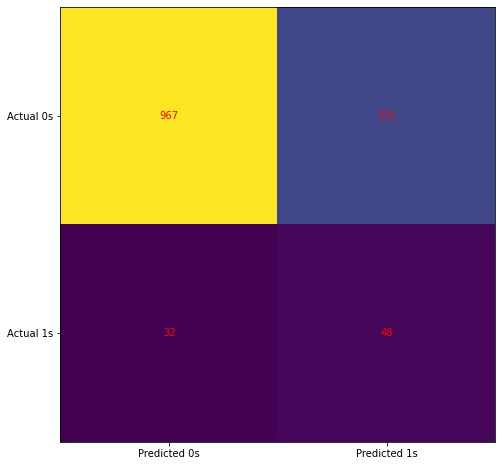

In [60]:
cm = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [61]:
rc_rf = acc_met(y_test, y_pred_rf)
print('Random Forest: Recall=%.3f' % (rc_rf))

Random Forest: Recall=0.600


We can see here again that the tuning of the hyper parameters has increased the usefulness of the model. 

### Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbc = GradientBoostingClassifier(n_estimators=300, random_state = 1)
model_res = gbc.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
rc_gbc = acc_met(y_test, y_pred)

In [64]:
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Gradient Boosting: Recall=%.3f' % (rc_gbc))

print('Gradient Boosting: f1-score=%.3f' % (f1))

print(cm)

Gradient Boosting: Recall=0.062
Gradient Boosting: f1-score=0.913
[[1190    8]
 [  75    5]]


In [65]:
list(zip(gbc.feature_importances_,X_test.columns))

[(0.2872112173190213, 'age'),
 (0.4415940191929307, 'avg_glucose_level'),
 (0.14447091726146513, 'bmi'),
 (0.02264993983482276, 'hypertension_Yes'),
 (0.030351931176851213, 'heart_disease_Yes'),
 (0.005847138759424065, 'gender_Male'),
 (0.009184263100951977, 'ever_married_Yes'),
 (0.0, 'work_type_Never_worked'),
 (0.015901190891869206, 'work_type_Private'),
 (0.006499009945964643, 'work_type_Self-employed'),
 (2.7069410217801147e-06, 'work_type_children'),
 (0.004068400901768943, 'Residence_type_Urban'),
 (0.00319248154838988, 'smoking_status_formerly smoked'),
 (0.01813943807469613, 'smoking_status_never smoked'),
 (0.010887345050822419, 'smoking_status_smokes')]

age : 0, Score: 0.28721
avg_glucose_level : 1, Score: 0.44159
bmi : 2, Score: 0.14447
hypertension_Yes : 3, Score: 0.02265
heart_disease_Yes : 4, Score: 0.03035
gender_Male : 5, Score: 0.00585
ever_married_Yes : 6, Score: 0.00918
work_type_Never_worked : 7, Score: 0.00000
work_type_Private : 8, Score: 0.01590
work_type_Self-employed : 9, Score: 0.00650
work_type_children : 10, Score: 0.00000
Residence_type_Urban : 11, Score: 0.00407
smoking_status_formerly smoked : 12, Score: 0.00319
smoking_status_never smoked : 13, Score: 0.01814
smoking_status_smokes : 14, Score: 0.01089


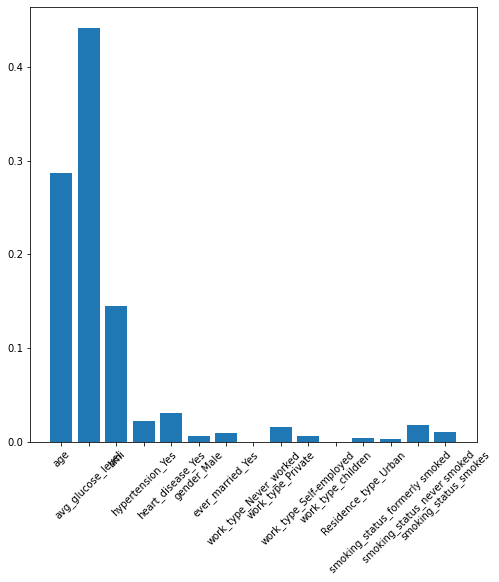

In [66]:
importance = gbc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(X_test.columns[i],': %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13, 14], labels = X_test.columns, rotation = 45)
plt.rcParams["figure.figsize"] = (8,8)
pyplot.show()

In [67]:
cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='recall')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='recall')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.0625 0.0625 0.0625 0.0625 0.    ]
Mean cross validation test score: 0.05
Mean cross validation train score: 0.03565062388591801
Standard deviation in cv scores: 0.025


In [68]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit( n_splits = 3, test_size = 0.20, random_state = 0)
    
    #  Create a decision tree regressor object
    regressor = GradientBoostingClassifier()

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth":[3,5,8, 12, 18],
             "n_estimators":[10,30,100, 150, 170]}

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(acc_met)

    #   Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
 #   print "Parameter 'max_depth' is {} for the optimal model.".format(grid.get_params() )

    # Return the optimal model after fitting the data
    return grid 



In [69]:
reg = fit_model(X_train, y_train)
print(reg)

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.2, train_size=None),
             estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 8, 12, 18],
                         'n_estimators': [10, 30, 100, 150, 170]},
             scoring=make_scorer(acc_met))


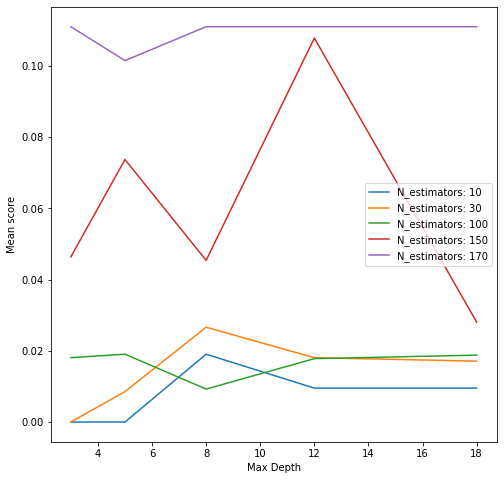

In [70]:
scores = list(reg.cv_results_['mean_test_score'])
scores = np.array(scores).reshape(5,5)
n_estimators = [10,30,100, 150, 170]
for ind, i in enumerate(scores):
    plt.plot([3,5,8, 12,18], scores[ind], label='N_estimators: ' + str(n_estimators[ind]))
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Mean score')
plt.show()

In [71]:
gbc = GradientBoostingClassifier(n_estimators=170, max_depth = 8, random_state = 1)
model_res = gbc.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
rc_gbc = acc_met(y_test, y_pred)
print("Tuned Gradient Boosting Classifier: ", rc_gbc)

Tuned Gradient Boosting Classifier:  0.0625


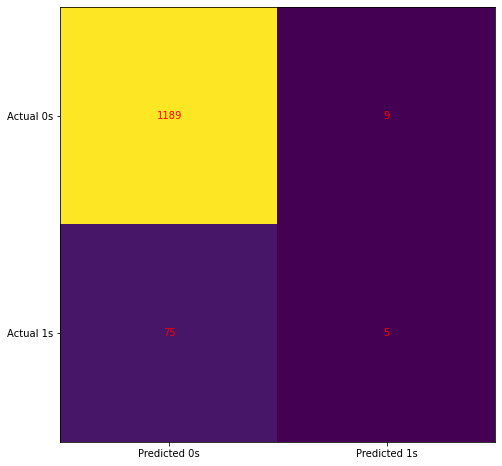

In [72]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Model Comparison

In [73]:
myLabels = [ 'Decision Tree','KNN','Random Forest', 'Gradient Boosting Classifier']
score_test= [ cv_scores_dt_test, cv_scores_knn_test,cv_scores_rf_test, cv_scores_gbc_test]
score_train= [  cv_scores_dt_train,cv_scores_knn_train,cv_scores_rf_train, cv_scores_gbc_train]
Recall_score_l = [rc_dt,rc_knn,rc_rf, rc_gbc]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Recall_score_l)), 
               columns =['Algorithm', 'Model Recall score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

                      Algorithm  Model Recall score
0                 Decision Tree              0.2750
1                           KNN              0.0125
2                 Random Forest              0.6000
3  Gradient Boosting Classifier              0.0625


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Decision Tree,0.136542,0.175
1,KNN,0.041533,0.025
2,Random Forest,0.011943,0.000
3,Gradient Boosting Classifier,0.035651,0.050


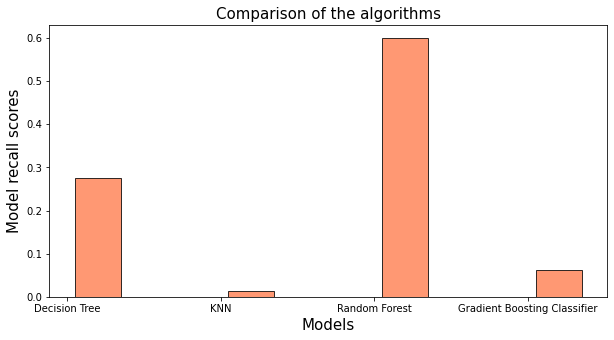

In [74]:
#plotting the Recall scores:


index=[1,2,3,4]
index_acc=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model recall scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Recall_score_l,color='coral',alpha=0.8,label='Recall score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4], myLabels)
#plt.legend()
plt.savefig("26.png")
plt.show()



### Comparing Confusion Matrices for Best Model: Random Forest

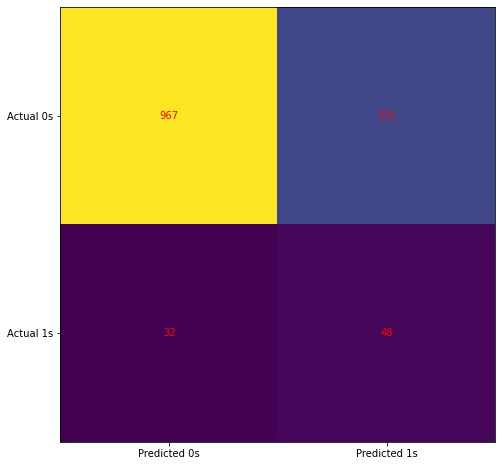

In [75]:
cm = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [76]:
stroke_ratio = 249/4861
# comparing if RF model is better than a binary numpy array with the ratio created above: stroke ratio
s = np.random.binomial(1, stroke_ratio, 1278)
print(s)

[0 0 0 ... 0 0 0]


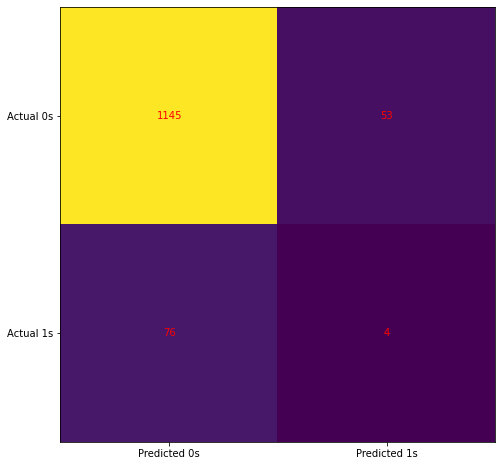

In [77]:
cm = confusion_matrix(y_test, s)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

We can see from comparing the predicted & actual 1s that the random forest model is predicting better than just by the proportion, therefore we can determine that the model is efficient enough at predicting to use.

In [90]:
# best model
clf = RandomForestClassifier(class_weight = 'balanced', max_depth = 6, n_estimators = 10)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=10)

In [108]:
X_test.head()

,age,avg_glucose_level,bmi,hypertension_Yes,heart_disease_Yes,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4688,-0.540751,-0.912069,-0.761421,0,0,1,0,0,0,1,0,0,0,0,0
4478,-0.142705,-0.902351,-0.073003,0,0,1,1,0,0,1,0,0,0,1,0
3849,-1.557980,-0.700713,-0.826366,0,0,0,0,0,0,0,1,1,0,0,0
4355,1.582163,-0.651684,-1.216037,1,0,0,1,0,0,1,0,0,0,1,0
3826,1.405253,-0.251279,-0.215882,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
X = df.drop('stroke', axis = 1)

In [169]:
#create function to determine prediction of new input
def predict_stroke(age, avg_glucose_level, bmi, hypertension, 
                   heart_disease, gender, ever_married, work_type, 
                   Residence_type, smoking_status, clf, mean_age, std_age, mean_avgglu, 
                   std_avgglu, mean_bmi, std_bmi):
    age  = (age - mean_age)/std_age
    
    avg_glucose_level = (avg_glucose_level - mean_avgglu)/std_avgglu
    
    bmi = (bmi - mean_bmi)/std_bmi
    
    X_new = {'age': age, 'avg_glucose_level': avg_glucose_level, 'bmi': bmi, 'hypertension':hypertension,
             'heart_disease': heart_disease, 'gender' : gender, 'ever_married': ever_married, 'work_type': work_type,
             'Residence_type':Residence_type, 'smoking_status': smoking_status}
    
    df2 = X.append(X_new, ignore_index = True)
    
    df3 = pd.get_dummies(df2, drop_first = True)
    
    df4 = pd.DataFrame(columns=list(X_test.columns))
    df4.loc[0] = df3.iloc[-1]
    
    y_pred = clf.predict(df4)
    
    proba = clf.predict_proba(df4)
    
    return y_pred, proba
    


In [170]:
X = predict_stroke(34, 350, 35, 'Yes', 'No', 'Female', 'Yes', 'Private', 'Urban', 'never smoked', clf, mean_age, std_age, mean_avgglu, std_avgglu, mean_bmi, std_bmi)

In [171]:
# Shows us that the prediction for the above data is no stroke, with a confidence of 0.63, a relatively 
# good prediction
print(X)

(array([0]), array([[0.63488337, 0.36511663]]))


### Conclusions
In order to effectively predict stroke occurance, I looked at 14 features to most accurately predict, with the most important features being age, bmi, and avg glucose level.
This is a classification problem and used below models to identify accurate predictions
Random Forrest Classifier
Decision Tree
K-Nearest Neighbor
and Gradient Boosting Classifier
On initial testing it seemed the Random Forest model to be the most accurate model, and after tuning the Random Forrest and Gradient Boosting model and the Decision Tree Model, I found the Random Forest model has the highest Recall Score of 0.60. 
The data was split into a test size of 0.25, and a training set of 0.75.



### Improvements
There is room for improvement in the data, there were 5110 patients yet there is room for more data. One of the reasons the recall score may be lower than hoped, is that there is not enough data of patients with strokes  More classification algorithms could be used to compare and determine if there is a model with more predictive power. Some features with less importance could be removed to determine if that effects the predicting power. 